In [1]:
args_region = '/public/home/lizw/task/pore_c/porec_result/porecplot/cross_region/chr5_cross.region.bed'
args_anchor = '/public/home/lizw/task/pore_c/porec_result/porecplot/cross_region/chr5_cross.anchor.bed'
args_align_merge_part = '/public/home/lizw/task/pore_c/porec_result2/DpnII_run04.order_2_merge_part.csv'
args_keepall = '/public/home/lizw/task/pore_c/porec_result2/DpnII_run04.order_2_sorted_orderall_fornormailize.csv'
args_clusterheat = True
args_binsize = 2000
args_calculate = 'binnor'
args_prefix = 'DpnII_run04_slice_cross_test'
args_mark = '/public/home/lizw/data/IMPORTANT_genome/arabidopsis/tair10/normal_mark.txt'
args_bedgraphs = ['/public/home/lizw/data/IMPORTANT_genome/arabidopsis/modification/H3K4me2-DRX066771.bw.bg','/public/home/lizw/data/IMPORTANT_genome/arabidopsis/modification/H3K27me3-SRX648279.bw.bg']
args_bg_labels = ['H3K4me2','H3K27me3']
args_bg_ylims = [None,None]
args_plotkind = 'bar'
args_sites = []
args_site_labels = [None]
args_site_ylims = [None]
args_anchormode = 'and'
args_genemodel = ''
args_ylim = "no"
args_cluster_slice =True
args_format = 'png'

In [13]:
args_anchor = "/public/home/lizw/task/pore_c/porec_result2/bed/cross_2/cross_1-4899k-4900k_anchor.bed"
args_region = "/public/home/lizw/task/pore_c/porec_result2/bed/cross_2/cross_1-4899k-4900k_anchor.bed.region_mask.bed"
args_align_merge_part = '/public/home/lizw/task/pore_c/porec_result2/DpnII_run04.order_2_merge_part.csv'
args_keepall = '/public/home/lizw/task/pore_c/porec_result2/DpnII_run04.order_2_sorted_orderall_fornormailize.csv'
args_clusterheat = True
args_binsize = 500
args_calculate = 'binnor'
args_prefix = 'DpnII_run04_slice_cross_test'
args_mark = '/public/home/lizw/data/IMPORTANT_genome/arabidopsis/tair10/normal_mark.txt'
args_bedgraphs = ['/public/home/lizw/data/IMPORTANT_genome/arabidopsis/modification/H3K4me2-DRX066771.bw.bg','/public/home/lizw/data/IMPORTANT_genome/arabidopsis/modification/H3K27me3-SRX648279.bw.bg']
args_bg_labels = ['H3K4me2','H3K27me3']
args_bg_ylims = [None,None]
args_plotkind = 'bar'
args_sites = []
args_site_labels = [None]
args_site_ylims = [None]
args_anchormode = 'and'
args_genemodel = ''
args_ylim = "no"
args_cluster_slice =True
args_format = 'png'

/public/home/lizw/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():


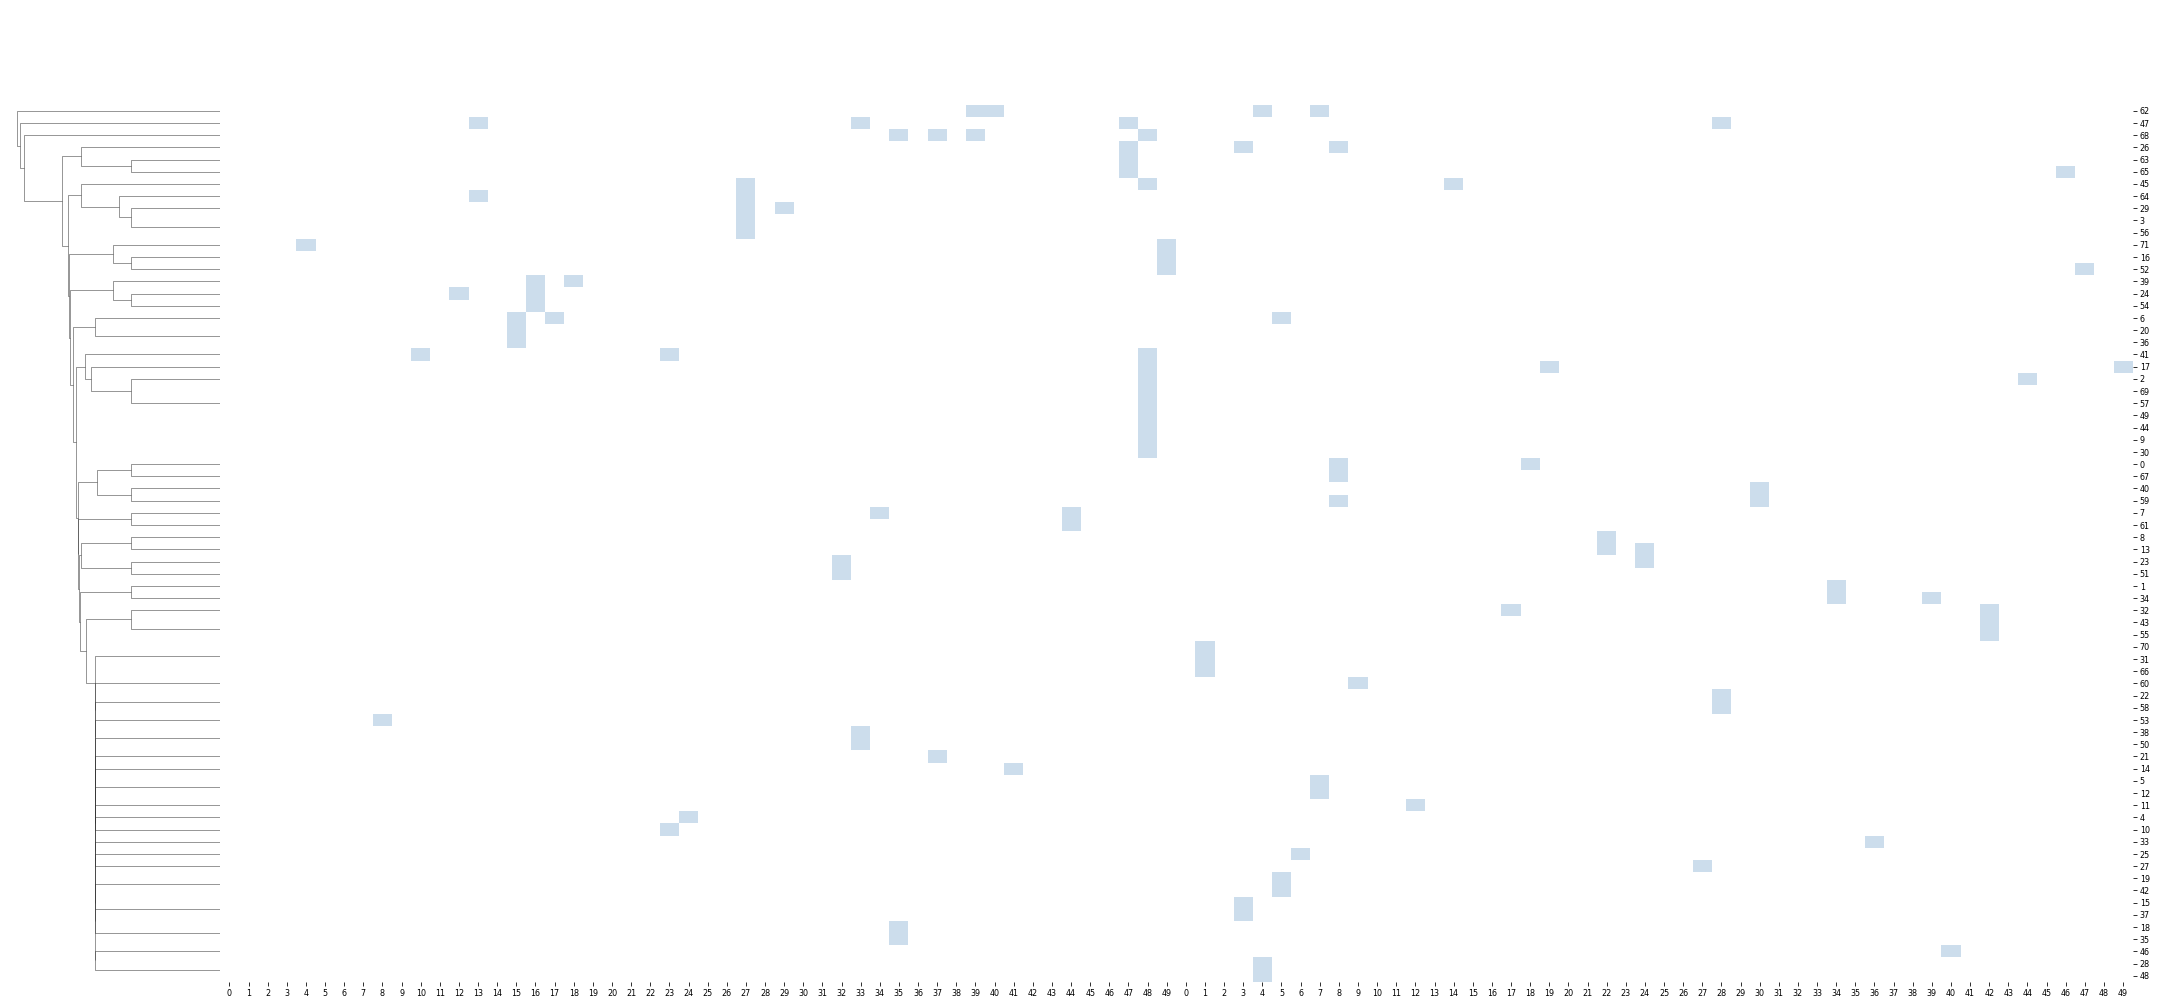

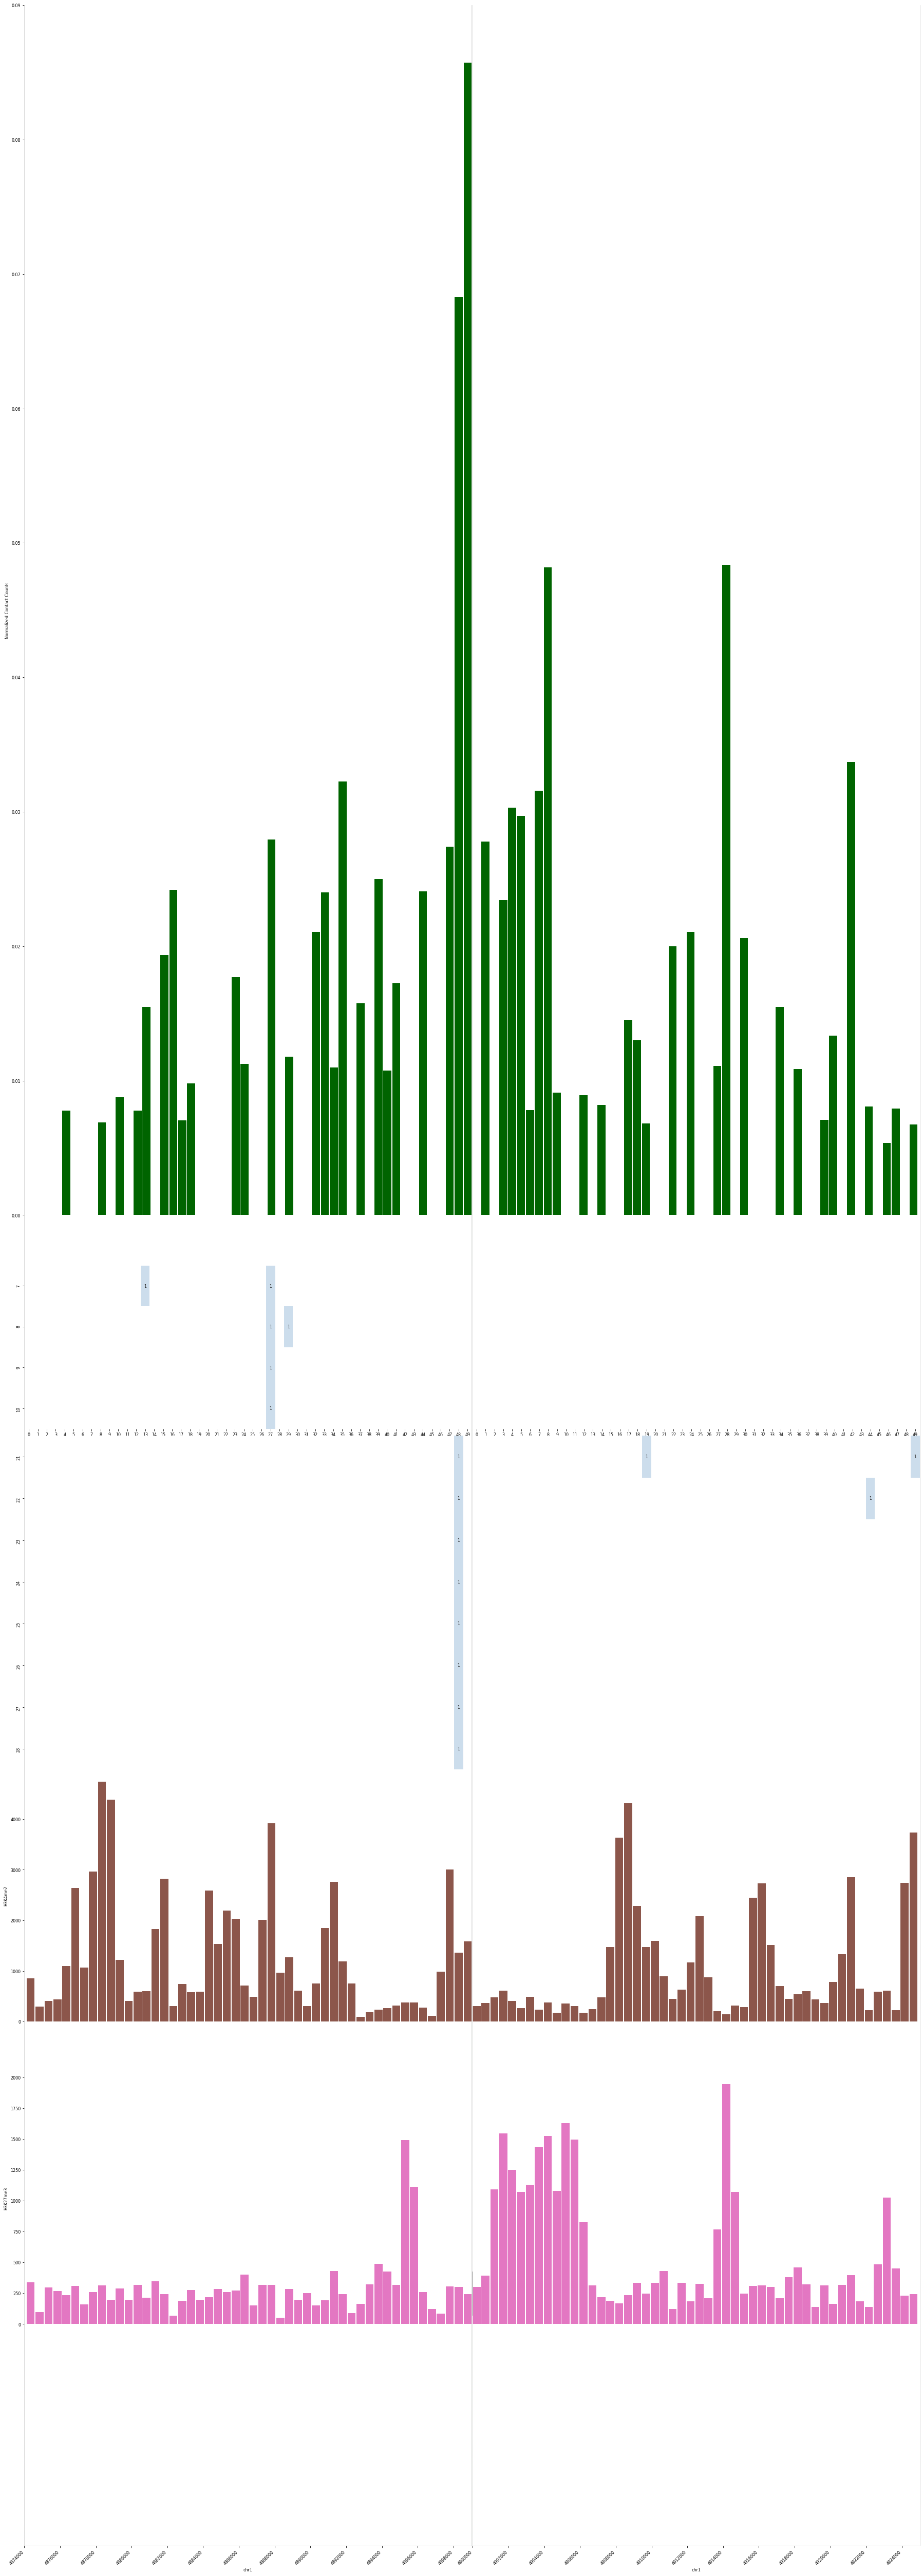

In [14]:
from porecplot_draw_func import *
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 8

from matplotlib.gridspec import GridSpec
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
import math

region_df = region_reads(args_region)
anchor = pd.read_csv(args_anchor,sep="\t",header=None,usecols=[0,1,2],names=['chr','start','end'],converters={'chr':str, 'start':int, 'end':int},comment="#")
df_merge_part = pd.read_csv(args_align_merge_part,sep='\t',comment="#")
merge_keepall_part = pd.read_csv(args_keepall,header=None,sep='\t',names=['chr','site'],converters={'chr':str, 'site':int},comment="#")

anchor_interval_count,anchor_filter_merge = anchor_reads(anchor,df_merge_part,region_df,'fragment_mid',args_binsize,args_anchormode,args_prefix,True)

anchor_binnor_merge_all_sort = anchor_calcu(merge_keepall_part,anchor_interval_count,region_df,args_binsize,args_prefix,True)

from porecplot_draw_func_for_slice import *
viridis = cm.get_cmap('BuPu', 6)
newcolors = viridis(np.linspace(0, 1, 256))
white = np.array([255/255, 255/255, 255/255, 1])
newcolors[:50, :] = white
newcmp = ListedColormap(newcolors)

mark = pd.read_csv(args_mark,sep="\t",header=None,names=['chr','start','end','color'],converters={'chr':str, 'start':int, 'end':int,'color':str},comment="#")
heat_concat,read_concat = heat_df(anchor_binnor_merge_all_sort,anchor_filter_merge)

if args_genemodel:
    gene_isoform = pd.read_csv(args_genemodel, sep='\t', names=['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts'],comment="#")

#define the absolute length of each part, and calculate the proportion, so the main plot would stay the same while other tracks added
#canvas1 clustermap have its own organization of axis, draw first, and add other based on it

bg_len = len(args_bedgraphs) if args_bedgraphs else 0
site_len = len(args_sites) if args_sites else 0 

if (args_clusterheat == True and len(heat_concat) >= 10):
    yflen = 12+bg_len+site_len
    cluster_top_para = 4.2
    cluster_bottom_para = colorbar_bottom_para = 10.5
    colorbar_top_para = 5
    
    clustermap = sns.clustermap(heat_concat, figsize=(30,yflen),cmap = newcmp,col_cluster=False,vmin=0-0.5,vmax=5+0.5,dendrogram_ratio=0.1,cbar_pos=None)
    read_order = clustermap.dendrogram_row.reordered_ind
    
    #output the read matrix after sorted by clustr heatmap
    heat_concat['cluster'] = heat_concat.index.astype('category')
    heat_concat['cluster'].cat.reorder_categories(read_order,inplace=True)
    heat_concat_sort = heat_concat.sort_values('cluster')
    
    below_cluster_para = cluster_bottom_para + 0.5
    along_with_porecplot(mainplot,anchor_binnor_merge_all_sort,region_df,ax_binsum,args_calculate,args_plotkind,args_ylim,args_bedgraphs,args_sites,args_genemodel,args_prefix,args_mark,below_cluster_para,yflen)
    plt.savefig(f'{args_prefix}_binsize{args_binsize}_porecplot.{args_format}',format = args_format,dpi=300,bbox_inches = 'tight')
    with open (f'{args_prefix}.report','a+') as report:
        report.write('porecplot_draw!')


    if args_cluster_slice:
        mainplot = plt.figure(figsize=(30, ylen))
        heat_concat_sort.reset_index(drop=True,inplace=True)
        heat_concat_sort_np = heat_concat_sort.drop(columns='cluster').to_numpy()
        coor = np.where(heat_concat_sort_np!=0)
        coor_df = pd.DataFrame(coor).T
        coor_df.columns=['row','column']
        read_df = read_concat.iloc[:,0]
        coor_list={}
        read_block_len = 0
        for i in coor_df.groupby(by='column'):
            df = i[1]
            df.sort_values(by='row',inplace=True)
            df['diff'] = df['row'].diff()
            df['consecutive'] = df['diff'].groupby((df['diff'] != df['diff'].shift()).cumsum()).transform('size')
            df.query('diff==1&consecutive>=3',inplace=True)
            df_row_list = df['row'].to_list()
            if df_row_list:
                coor_list[i[0]]= df_row_list
                read_block_len += len(df_row_list)

        yflen = bg_len+site_len + read_block_len*0.2



        heat_n = 0
        for read_group in coor_list:
            heat_sub_top = 1-(cluster_top_para+ 0.2 )/yflen
            heat_sub_bottom = 1-(read_block_len*0.15+cluster_top_para+ 0.2 +0.2)/yflen
            gs1 =  GridSpec(read_block_len,1, top=heat_sub_top,bottom=heat_sub_bottom,left = 0.093,right = 0.9)
            heat_concat_sort_sub = heat_concat_sort.iloc[coor_list[read_group],:-1]
            heat_concat_sort_sub.mask(heat_concat_sort_sub==0,inplace=True)
            heat_last = heat_n
            heat_len = len(coor_list[read_group])
            heat_n = heat_last + heat_len
            ax_sub_heat = mainplot.add_subplot(gs1[heat_last:heat_n])
            ax_sub_heat.set_xlabel('')
            ax_sub_heat.set_ylabel(read_group)
            sns.heatmap(heat_concat_sort_sub,cmap = newcmp,vmin=0-0.5,vmax=5+0.5,ax = ax_sub_heat,cbar=False,annot=True)

        below_cluster_para = cluster_top_para+ 0.2 + read_block_len*0.15+0.2
        along_with_porecplot(mainplot,anchor_binnor_merge_all_sort,region_df,ax_binsum,args_calculate,args_plotkind,args_ylim,args_bedgraphs,args_sites,args_genemodel,args_prefix,args_mark,below_cluster_para,yflen)
        plt.savefig(f'{args_prefix}_binsize{args_binsize}_slice_porecplot.{args_format}',format = args_format,dpi=300,bbox_inches = 'tight')
        with open (f'{args_prefix}.report','a+') as report:
            report.write('slice_porecplot_draw!')

In [460]:
heat_concat_sort_sub.mask(heat_concat_sort_sub==0)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,cluster
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N